# Why do people change their minds/behaviors over the time?

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math 
import statistics as stat
from sklearn.metrics import mean_squared_error
import scipy.stats as stats
import networkx as nx
import random
import itertools

# Define the "world" parameters

In [ ]:
# initialisation 

N = 100             # population size
A = 65              # initial proportion of group A
B = N-A             # initial proportion of group B

MAX_TIME = 100      # number of the simulation steps  


Ta = 1.0            # initial attractiveness of option A
Tb = 2.0            # initial attractiveness of option B
alpha = 0.1         # strength of the transmission process

# Initialize the "world"

In [ ]:
t = 0               # initial time

# initialise the lists of group A and B
groupA = []    
groupB = []

#add to the initial populations
groupA.append(A) 
groupB.append(B)

# Simulation

# 1. Change behavior by influence/attraction

    1. set the initial value of A to 5, 10, 25, 50, 75
    2. set the MAX_TIME to 1000,100000
    3. set the Ta and Tb to 1.0, 10.0, 0.1, 0.01, etc. 
    4. set alpha to 0.01, and 1.0

In [ ]:
#payoff: the interest of 'conversion' of adopters from one option to another

def payoff(supporters, Pa,Pb):

    proportionSupporters = (supporters / N) 
    opinion_pressure = (Pa) / (Pb + Pa)
    return proportionSupporters * opinion_pressure

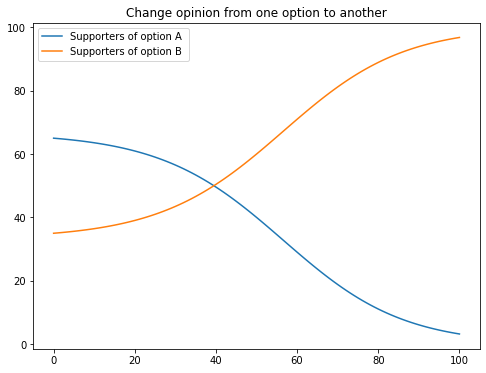

In [ ]:
while t < MAX_TIME: 
    # calculate the payoff for change of supporters of option A and option B in the current time step       
    transmissionBA = payoff(A, Ta, Tb)      
    transmissionAB = payoff(B, Tb, Ta)     
    difference = transmissionBA - transmissionAB

    # moving from option B -> A   
    if difference > 0:
        transmission = difference*B
    # moving from option A -> B        
    else:
        transmission = difference*A

    # control the pace of change with alpha
    transmission = alpha*transmission  

    # update the population    
    A = A + transmission
    B = B - transmission   

    # save the values to a list for plotting    
    groupA.append(A)
    groupB.append(B)

    # advance time to next iteration
    t = t + 1
    


plt.figure(figsize=(8, 6))
plt.plot(groupA,label='Supporters of option A ')
plt.plot(groupB,label='Supporters of option B')
plt.legend()
plt.title("Change opinion from one option to another")
plt.show()

# Different options for modelling attractiveness: 

    by establishing how much the attractiveness of each option changes

# a. Fixed dynamically change of option attractiveness

In [ ]:
# initialisation 

N = 100             # population size
A = 65              # initial proportion of group A
B = N-A             # initial proportion of group B

MAX_TIME = 100      # number of the simulation steps  


Ta = 1.0            # initial attractiveness of option A
Tb = 2.0            # initial attractiveness of option B
alpha = 0.1         # strength of the transmission process


t = 0               # initial time

# initialise the lists of group A and B
groupA = []    
groupB = []

#add to the initial populations
groupA.append(A) 
groupB.append(B)


In [ ]:
def fixed_attractiveness(Ta, Tb):
    Ka = 0.2
    Kb = 0.1
    Ta = Ta + Ka
    Tb = Tb + Kb
    return Ta, Tb

Text(0.5, 1.0, 'Change opinion from one option to another, rate of change= 0.1\n')

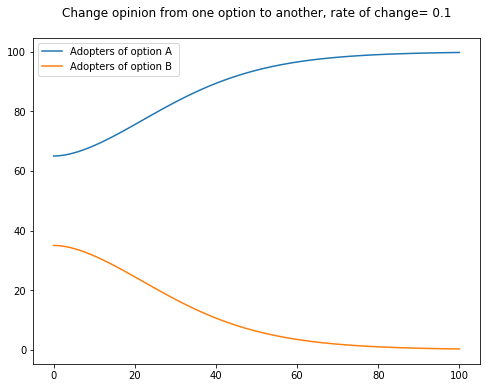

In [ ]:
while t < MAX_TIME:
    # update attractiveness
    Ta, Tb = fixed_attractiveness(Ta, Tb)
    # calculate the payoff for change of supporters of option A and option B in the current time step 
    transmissionBA = payoff(A, Ta, Tb)
    transmissionAB = payoff(B, Tb, Ta)
    difference = transmissionBA - transmissionAB
     # moving from option B -> A  
    if difference > 0:
        transmission = difference*B
      # moving from option A -> B  
    else:
        transmission = difference*A
        # control the pace of change with alpha
    transmission = alpha*transmission
    # update the population
    A = A + transmission
    B = B - transmission
    # save the values to a list for plotting
    groupA.append(A)
    groupB.append(B)
    # advance time to next iteration
    t = t + 1

# plot the results  
plt.figure(figsize=(8, 6))
plt.plot(groupA,label='Adopters of option A ')
plt.plot(groupB,label='Adopters of option B')
plt.legend()
plt.title("Change opinion from one option to another, rate of change= " f'{alpha}\n')


# b. Gaussian Stochastic dynamically change of option attractiveness

In [ ]:
# initialisation 

N = 100             # population size
A = 65              # initial proportion of group A
B = N-A             # initial proportion of group B

MAX_TIME = 100      # number of the simulation steps  


Ta = 1.0            # initial attractiveness of option A
Tb = 2.0            # initial attractiveness of option B
alpha =0.1        # strength of the transmission process


t = 0               # initial time

# initialise the lists of group A and B
groupA = []    
groupB = []

#add to the initial populations
groupA.append(A) 
groupB.append(B)


In [ ]:
def Stochastic_attractiveness(Ta, Tb):

    Ka, Kb = np.random.normal(0, 1, 2)

    diff = Ka-Kb
    
    Ta += diff
    Tb -= diff
    return Ta, Tb

Text(0.5, 1.0, 'Change opinion from one option to another, rate of change= 0.1\n')

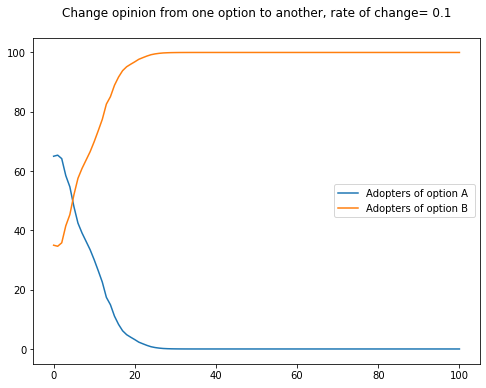

In [ ]:
while t < MAX_TIME:
    # update attractiveness
    Ta, Tb = Stochastic_attractiveness(Ta, Tb)
    # calculate the payoff for change of supporters of option A and option B in the current time step 
    transmissionBA = payoff(A, Ta, Tb)
    transmissionAB = payoff(B, Tb, Ta)
    difference = transmissionBA - transmissionAB
     # moving from option B -> A  
    if difference > 0:
        transmission = difference*B
      # moving from option A -> B  
    else:
        transmission = difference*A
        # control the pace of change with alpha
    transmission = alpha*transmission
    # update the population
    A = A + transmission
    B = B - transmission
    # save the values to a list for plotting
    groupA.append(A)
    groupB.append(B)
    # advance time to next iteration
    t = t + 1

# plot the results  
plt.figure(figsize=(8, 6))
plt.plot(groupA,label='Adopters of option A ')
plt.plot(groupB,label='Adopters of option B')
plt.legend()
plt.title("Change opinion from one option to another, rate of change= " f'{alpha}\n')


# c.Gamma stochastic  dynamically change of option attractiveness

In [ ]:
# initialisation 

N = 100             # population size
A = 65              # initial proportion of group A
B = N-A             # initial proportion of group B

MAX_TIME = 100      # number of the simulation steps  


Ta = 1.0            # initial attractiveness of option A
Tb = 2.0            # initial attractiveness of option B
alpha =0.1        # strength of the transmission process


t = 0               # initial time

# initialise the lists of group A and B
groupA = []    
groupB = []

#add to the initial populations
groupA.append(A) 
groupB.append(B)


In [ ]:
def gamma_attractiveness(Ta, Tb):
    

    Ka = 0
    Kb = 0
    

    diff = np.random.gamma(groupA[t]) - np.random.gamma(groupB[t])
    
     # more population means less attractiveness
    # if B is larger then we need to increase the attractiveness of A
    if diff < 0:
        Ka = -diff
    # else A is larger and we need to increase the attractiveness of B
    else:
        Kb = diff
        
    # change current values
    Ta = Ta + Ka
    Tb = Tb + Kb
    return Ta, Tb

Text(0.5, 1.0, 'Change opinion from one option to another, rate of change= 0.1\n')

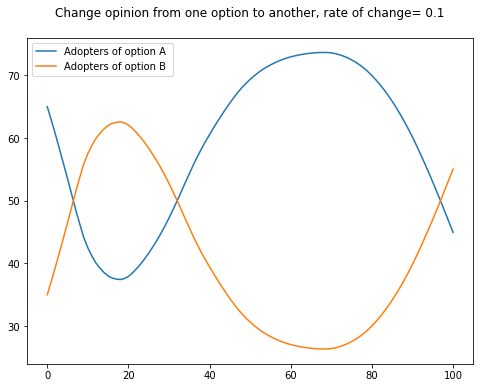

In [ ]:
while t < MAX_TIME:
    # update attractiveness
    Ta, Tb = gamma_attractiveness(Ta, Tb)
    # calculate the payoff for change of supporters of option A and option B in the current time step 
    transmissionBA = payoff(A, Ta, Tb)
    transmissionAB = payoff(B, Tb, Ta)
    difference = transmissionBA - transmissionAB
     # moving from option B -> A  
    if difference > 0:
        transmission = difference*B
      # moving from option A -> B  
    else:
        transmission = difference*A
        # control the pace of change with alpha
    transmission = alpha*transmission
    # update the population
    A = A + transmission
    B = B - transmission
    # save the values to a list for plotting
    groupA.append(A)
    groupB.append(B)
    # advance time to next iteration
    t = t + 1

# plot the results  
plt.figure(figsize=(8, 6))
plt.plot(groupA,label='Adopters of option A ')
plt.plot(groupB,label='Adopters of option B')
plt.legend()
plt.title("Change opinion from one option to another, rate of change= " f'{alpha}\n')


# 2. Chaos: behavior of bipolar disorder patient

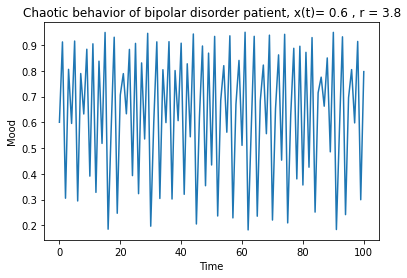

In [ ]:

run_time=100   # number of the simulation steps  

x = np.zeros(run_time+1)
x[0]=0.6 #initial daily mood

r=3.8 #severity of the individual’s diagnosis on a scale of 0 to 4

for t in range(run_time):
    x[t+1] = r* x[t]*(1-x[t])  

plt.plot(x)
plt.xlabel('Time')
plt.ylabel('Mood')
plt.title('Chaotic behavior of bipolar disorder patient, x(t)= 0.6 , r = ' f'{r}')
plt.show()


# 3. The behavioral synchronization of two individuals in social interaction

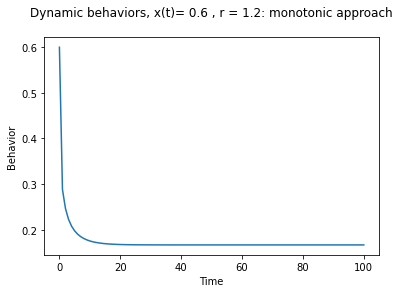

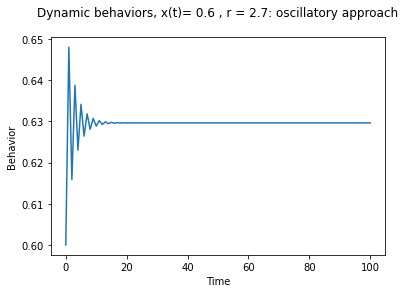

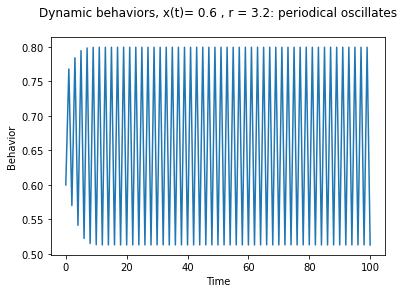

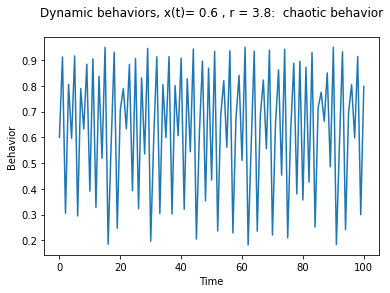

In [ ]:
run_time=100    # number of the simulation steps
x = np.zeros(run_time+1)

x[0]=0.6  #initial daily mood 


def getList(dict):
    list = []
    for key in dict.keys():
        list.append(key)
          
    return list


A={1.2:'monotonic approach',2.7:'oscillatory approach',3.2:'periodical oscillates',3.8:' chaotic behavior'}

for i in getList(A):
       
    for t in range(run_time):
        x[t+1] = i* x[t]*(1-x[t])  
   
    
    plt.plot(x)
    plt.xlabel('Time')
    plt.ylabel('Behavior')
    plt.title('Dynamic behaviors, x(t)= 0.6 , r = ' f'{i}: {A.get(i)}\n')
    plt.show()


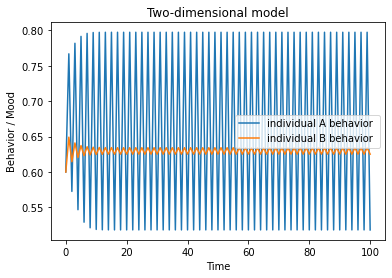

In [ ]:
x1 = np.zeros(run_time+1)
x2= np.zeros(run_time+1)

x1[0]=0.6
x2[0]=0.6
r1=3.2
r2=2.7
alpha=0.01





for t in range(run_time):
    x1[t+1] = (r1* x1[t]*(1-x1[t]) + alpha*r2*x2[t]*(1-x2[t]))/(1+alpha)
    x2[t+1]=(r2* x2[t]*(1-x2[t]) + alpha*r1*x1[t]*(1-x1[t]))/(1+alpha)

plt.figure()    
plt.plot(x1,label="individual A behavior ")
plt.plot(x2,label="individual B behavior ")
plt.xlabel('Time')
plt.ylabel('Behavior / Mood')
plt.title("Two-dimensional model")
plt.legend()

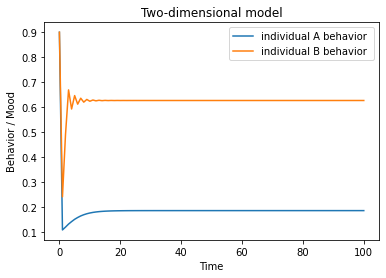

In [ ]:
x1 = np.zeros(run_time+1)
x2= np.zeros(run_time+1)

x1[0]=0.9
x2[0]=0.9
r1=1.2
r2=2.7
alpha=0.01




for t in range(run_time):
    x1[t+1] = (r1* x1[t]*(1-x1[t]) + alpha*r2*x2[t]*(1-x2[t]))/(1+alpha)
    x2[t+1]=(r2* x2[t]*(1-x2[t]) + alpha*r1*x1[t]*(1-x1[t]))/(1+alpha)

plt.figure()    
plt.plot(x1,label="individual A behavior ")
plt.plot(x2,label="individual B behavior ")
plt.xlabel('Time')
plt.ylabel('Behavior / Mood')
plt.title("Two-dimensional model")
plt.legend()

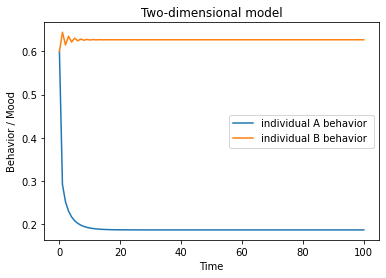

In [ ]:
x1 = np.zeros(run_time+1)
x2= np.zeros(run_time+1)

x1[0]=0.6
x2[0]=0.6
r1=1.2
r2=2.7
alpha=0.01




for t in range(run_time):
    x1[t+1] = (r1* x1[t]*(1-x1[t]) + alpha*r2*x2[t]*(1-x2[t]))/(1+alpha)
    x2[t+1]=(r2* x2[t]*(1-x2[t]) + alpha*r1*x1[t]*(1-x1[t]))/(1+alpha)

plt.figure()    
plt.plot(x1,label="individual A behavior ")
plt.plot(x2,label="individual B behavior ")
plt.xlabel('Time')
plt.ylabel('Behavior / Mood')
plt.title("Two-dimensional model")
plt.legend()